#ABOUT THE PROJECT


# **Customer Feedback Analysis Using Hierarchical Clustering**  

## **📌 Project Overview**  
Customer feedback is a crucial aspect of business success. In this project, we analyze **Twitter airline reviews** using **Hierarchical Clustering** to identify patterns in customer sentiment. Instead of using predefined sentiment labels, clustering helps discover **hidden groupings** of similar feedback, providing insights into customer satisfaction and common issues.

## **🎯 Objectives**  
- Preprocess customer feedback text from Twitter airline reviews.  
- Convert textual data into numerical format using **TF-IDF vectorization**.  
- Apply **Hierarchical Clustering** to group similar customer reviews.  
- Visualize clusters using **dendrograms and word clouds**.  
- Analyze patterns in customer sentiment without relying on predefined labels.  

## **📂 Dataset Used**  
- **Dataset Name**: [Twitter US Airline Sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)  
- **Key Features Selected**:  
  - **`text`** → The actual customer review (Main input for clustering).  
  - **(Optional) `airline`** → If we want airline-based clustering.  
  - **(Optional) `negativereason`** → If we want sub-clustering for negative reviews.  

## **🔄 Methodology**  
### **1. Data Preprocessing**  
- Remove special characters, numbers, and stopwords.  
- Convert text to lowercase and tokenize words.  
- Apply **TF-IDF Vectorization** to transform text into numerical features.  

### **2. Clustering Approach**  
- Use **Hierarchical Clustering (Agglomerative Clustering)**.  
- Experiment with different **linkage methods** (ward, complete, average).  
- Determine the number of clusters using a **dendrogram**.  

### **3. Visualization**  
- Plot a **dendrogram** to observe hierarchical relationships between clusters.  
- Use **word clouds** to understand common words in each cluster.  

## **🔍 Expected Insights**  
- Identify common themes in customer complaints and praises.  
- Detect **which airlines** receive similar types of feedback.  
- Recognize patterns in **negative reviews** (e.g., delays, customer service issues).  

## **🚀 Future Enhancements**  
- Compare clustering results with sentiment labels to evaluate effectiveness.  
- Apply **DBSCAN or K-Means** for alternative clustering approaches.  
- Implement **topic modeling** (LDA) to extract topics from reviews.  

---


#IMPORTING LIBRARIES AND LOADING CUSTOMER DATA


In [18]:
import pandas as pd

#for preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

#model building
import numpy as np
import scipy.cluster.hierarchy as sc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [19]:
customer_data=pd.read_csv('/content/Tweets.csv')

In [20]:
customer_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [21]:
customer_tweet_text=customer_data['text']

In [44]:
customer_data['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [22]:
customer_tweet_text.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [23]:
customer_tweet_text = customer_tweet_text.replace('@VirginAmerica', '', regex=True)
customer_tweet_text.head()

,text
0,What @dhepburn said.
1,plus you've added commercials to the experien...
2,I didn't today... Must mean I need to take an...
3,"it's really aggressive to blast obnoxious ""en..."
4,and it's a really big bad thing about it


In [24]:
customer_tweet_text.isnull().sum()

0

- Text Preprocessing:

  --> Tokenization (splitting sentences into words).

  --> Removing stopwords (common words like "and", "the", etc. that don't carry much meaning).

  --> Lemmatization/Stemming (reducing words to their base forms).
Convert text to lowercase.

  --> Remove unnecessary symbols, numbers, and punctuation.
- Text Vectorization

Convert text data into numerical format using techniques such as:
TF-IDF (Term Frequency-Inverse Document Frequency): This helps to weigh words based on their importance within the document and across the dataset.

In [25]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def TextPreprocessing(text):
  text=text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  tokens = [t for t in tokens if t.isalnum() and t not in ENGLISH_STOP_WORDS]
  return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
for i in range(0,len(customer_tweet_text)):
  customer_tweet_text[i]=TextPreprocessing(customer_tweet_text[i])

In [27]:
customer_tweet_text.head()

,text
0,dhepburn said
1,plus youve added commercials experience tacky
2,didnt today mean need trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


In [28]:
#vectorization ,converting into numarical format

vectorizer=TfidfVectorizer(max_features=1000)
X=vectorizer.fit_transform(customer_tweet_text)

In [29]:
print(vectorizer.get_feature_names_out())

['aa' 'able' 'absolute' 'absolutely' 'acceptable' 'access' 'account'
 'actual' 'actually' 'add' 'added' 'adding' 'address' 'advisory'
 'afternoon' 'agent' 'agents' 'ago' 'air' 'aircraft' 'airline' 'airlines'
 'airplane' 'airport' 'airports' 'airways' 'allow' 'allowed' 'amazing'
 'america' 'american' 'americanair' 'americanairlines' 'amp' 'angry'
 'answer' 'answered' 'answering' 'answers' 'anymore' 'apology' 'app'
 'apparently' 'appease' 'appreciate' 'appreciated' 'area' 'arent'
 'arrival' 'arrive' 'arrived' 'arrives' 'arriving' 'asap' 'ask' 'asked'
 'asking' 'assist' 'assistance' 'atl' 'atlanta' 'attendant' 'attendants'
 'attitude' 'austin' 'automated' 'available' 'avgeek' 'award' 'away'
 'awesome' 'awful' 'baby' 'bad' 'badservice' 'bag' 'baggage' 'bags' 'bank'
 'battles' 'bc' 'believe' 'best' 'better' 'big' 'birthday' 'bit' 'blue'
 'bna' 'board' 'boarded' 'boarding' 'book' 'booked' 'booking' 'bos'
 'boston' 'bother' 'bought' 'bring' 'broke' 'broken' 'bs' 'btw' 'bumped'
 'bus' 'busines

#CLUTERING

- creating dendogram

In [ ]:
# Convert sparse matrix to dense numpy array
X_dense = X.toarray()  # X is the TF-IDF sparse matrix


linked = sc.linkage(X_dense[range(1,200)], method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
sc.dendrogram(linked, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Twitter Sentiment")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()



In [ ]:
agg_cluster=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage='ward')



In [ ]:
X_dense.shape

In [ ]:
agg_cluster.labels_.value_counts()

In [37]:
customer_data['cluster'] = agg_cluster.fit_predict(X_dense)


In [38]:
customer_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cluster
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


In [36]:
customer_data['text']

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


In [39]:
customer_data['cluster'].value_counts()

,count
cluster,
0,14319
1,210
2,111


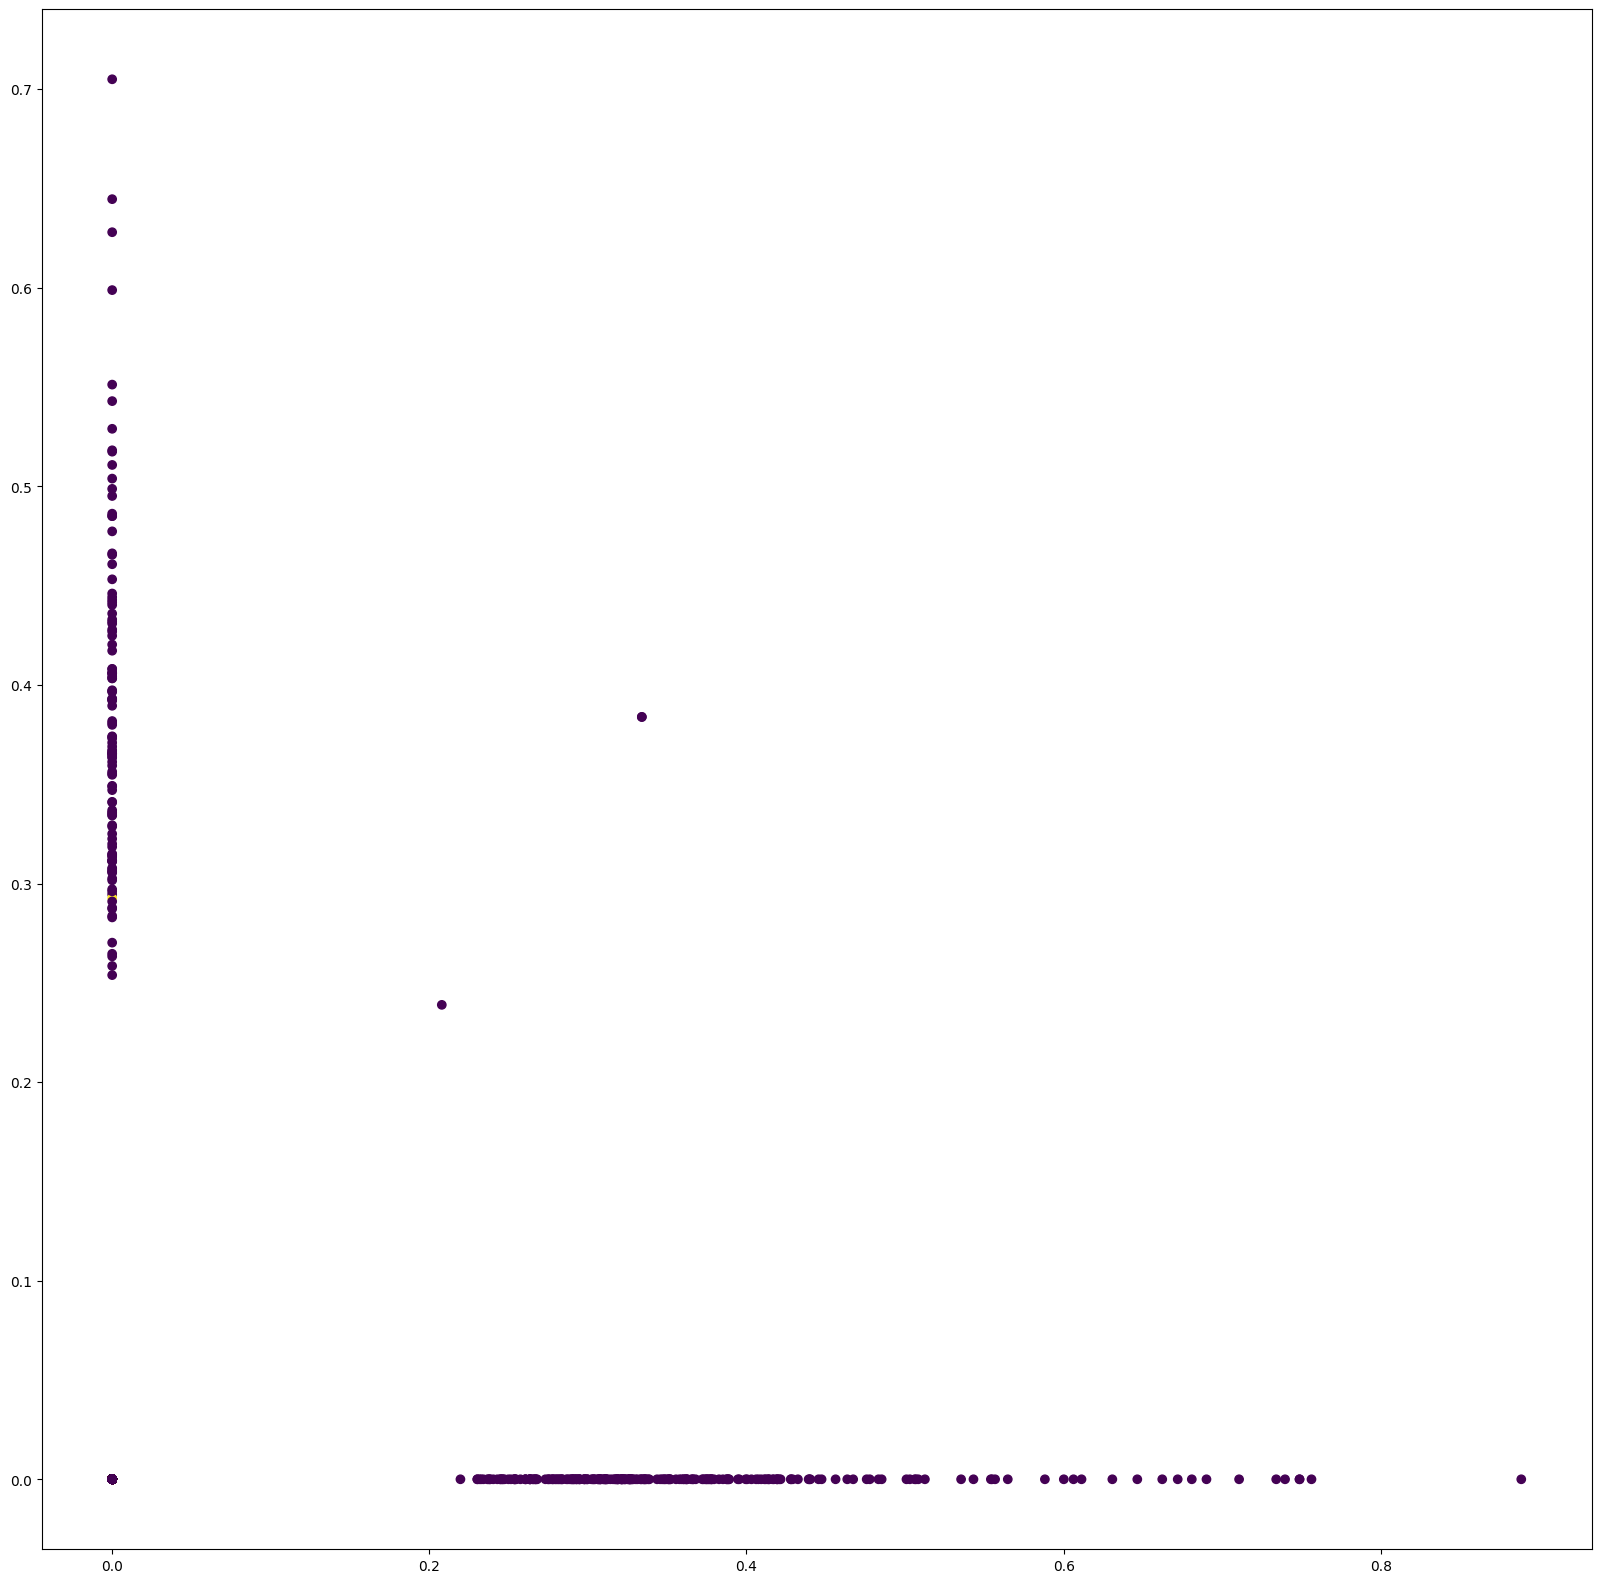

In [40]:
plt.figure(figsize=(20,20))
plt.scatter(X_dense[:,0],X_dense[:,1],c=agg_cluster.labels_)

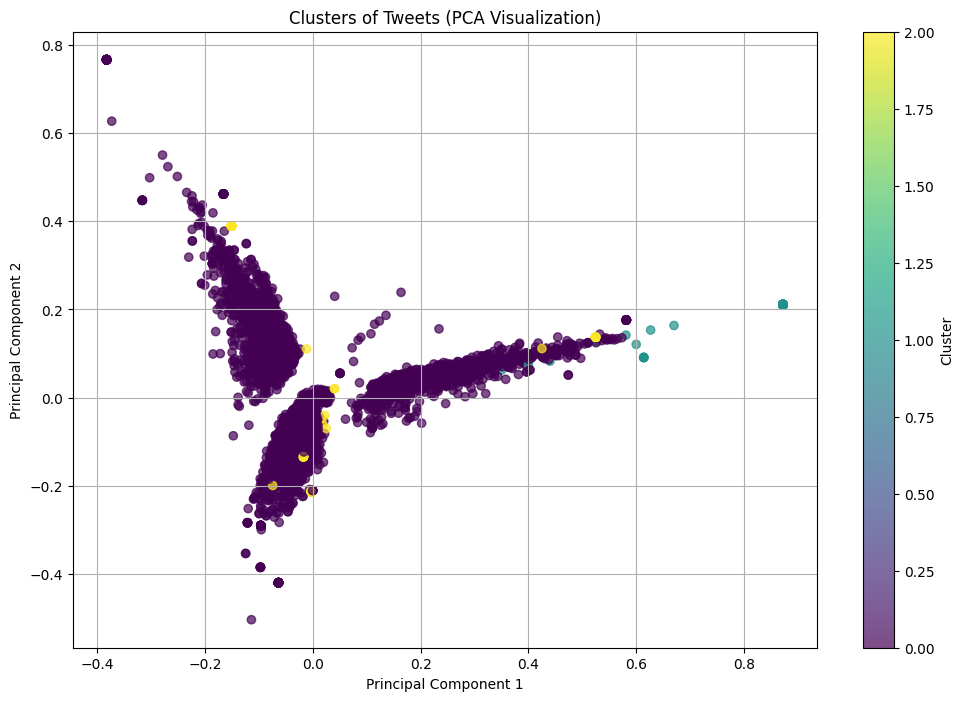

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_dense)  # X_dense is the dense representation of the TF-IDF matrix

# Scatter plot of the clusters
plt.figure(figsize=(12, 8))
plt.scatter(
    X_reduced[:, 0], X_reduced[:, 1], c=agg_cluster.labels_, cmap='viridis', alpha=0.7
)
plt.title("Clusters of Tweets (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
